# Import Library Packages and load/Validate Dataset

In [2]:
# Import packages
### YOUR CODE HERE ### 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for data modeling, metrics and model validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle

In [3]:
# Load dataset into a dataframe
df0 = pd.read_csv(r"C:\Users\wills\OneDrive\uh\Coursea Analytics\HR_comma_sep.csv")

# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'Department': 'department',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure'
                          })

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [8]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [9]:
# Check for duplicates
df0.duplicated().sum()

3008

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep='first')
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


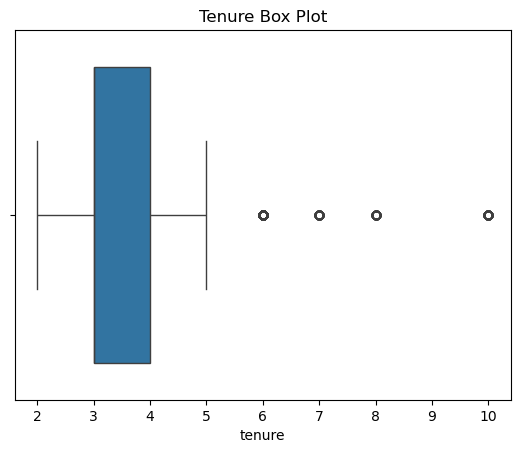

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Tenure Box Plot')
sns.boxplot(x=df1['tenure'])
plt.show()

# Analyze Data

In [12]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


## Visualizations

Text(0.5, 1.0, 'Data Set Correlation Heatmap')

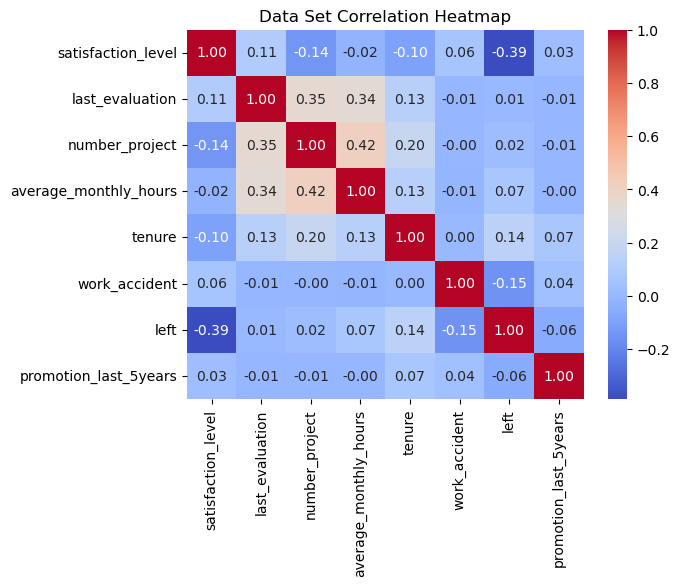

In [13]:
numeric_df = df0.select_dtypes(include='number')

#Plot a correlation heatmap
sns.heatmap(numeric_df.corr(),annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Data Set Correlation Heatmap')

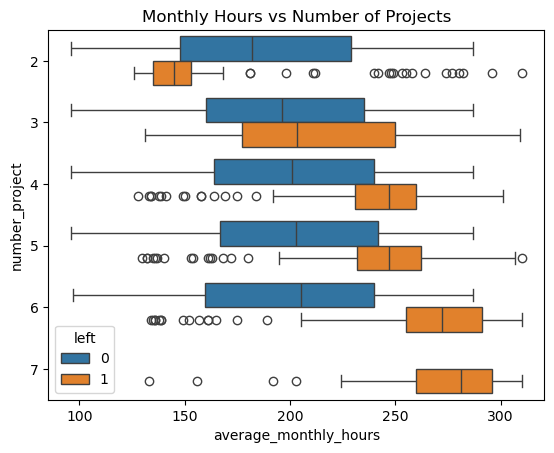

In [34]:
# Create a Boxplot showing Average Monthly hours compared to Number of Projects - This had a .42 on our heatmap
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h")
plt.title('Monthly Hours vs Number of Projects')
plt.show()

Text(0.5, 1.0, 'Monthly Hours worked compared to Satisfaction Level')

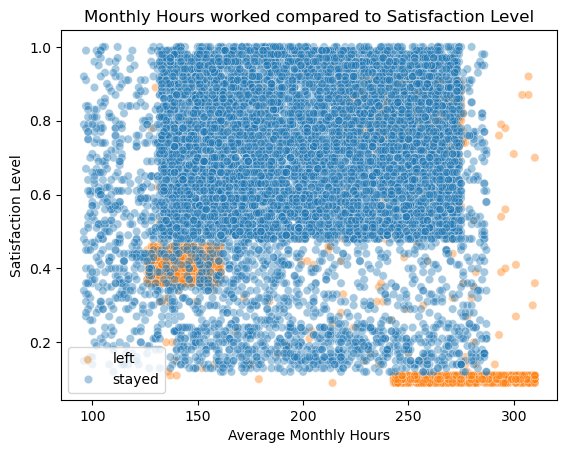

In [35]:
#Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
sns.scatterplot(data=df1,y='satisfaction_level', x='average_monthly_hours', hue=('left'),alpha=0.4)
plt.xlabel('Average Monthly Hours')
plt.ylabel('Satisfaction Level')
plt.legend(labels=['left', 'stayed'])
plt.title('Monthly Hours worked compared to Satisfaction Level')

Text(0.5, 1.0, 'Satisfaction Level Compared to Tenure')

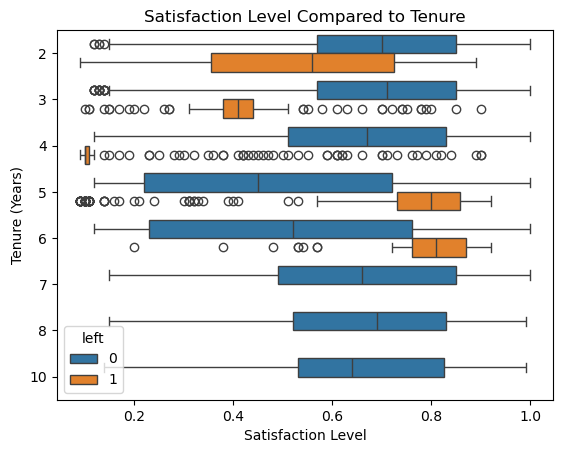

In [36]:
#Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
### YOUR CODE HERE ###
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
plt.xlabel('Satisfaction Level')
plt.ylabel('Tenure (Years)')
plt.title("Satisfaction Level Compared to Tenure")

Text(0.5, 1.0, 'Employees who left by department')

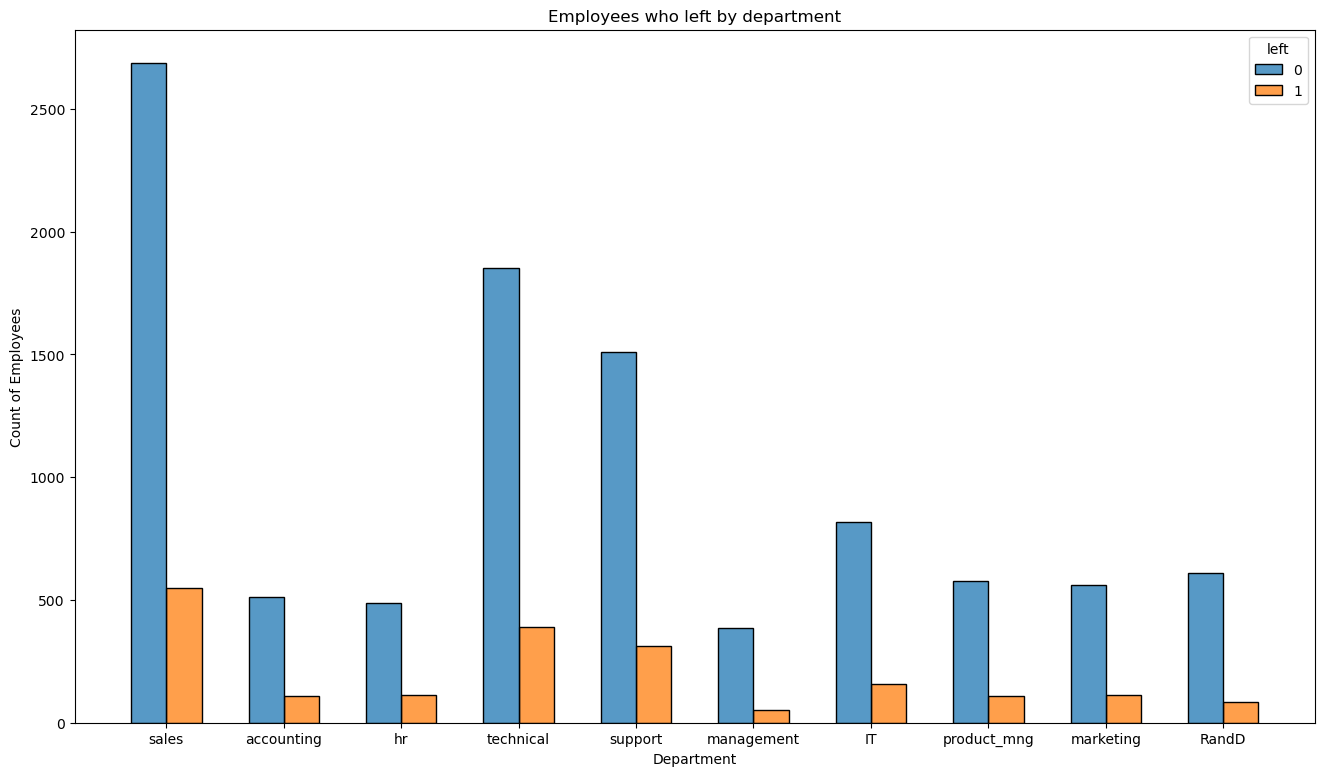

In [17]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
### YOUR CODE HERE ###
plt.figure(figsize=(16, 9))
sns.histplot(data=df1, x='department', hue='left', multiple="dodge", shrink=0.6)
plt.xlabel('Department')
plt.ylabel('Count of Employees')
plt.title("Employees who left by department")

Text(0.5, 1.0, 'Latest Evaluation compared to Average Monthly Hours')

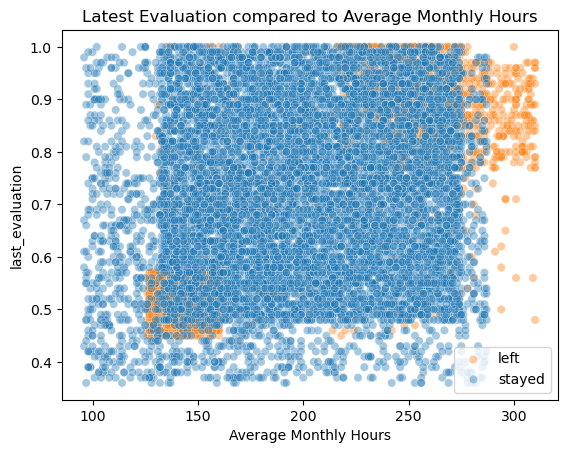

In [37]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
### YOUR CODE HERE ###
sns.scatterplot(data=df1,y='last_evaluation', x='average_monthly_hours', hue=('left'),alpha=0.4)
plt.xlabel('Average Monthly Hours')
plt.ylabel('last_evaluation')
plt.legend(labels=['left', 'stayed'])
plt.title('Latest Evaluation compared to Average Monthly Hours')

Text(0.5, 1.0, 'Latest Evaluation compared to Average Monthly Hours')

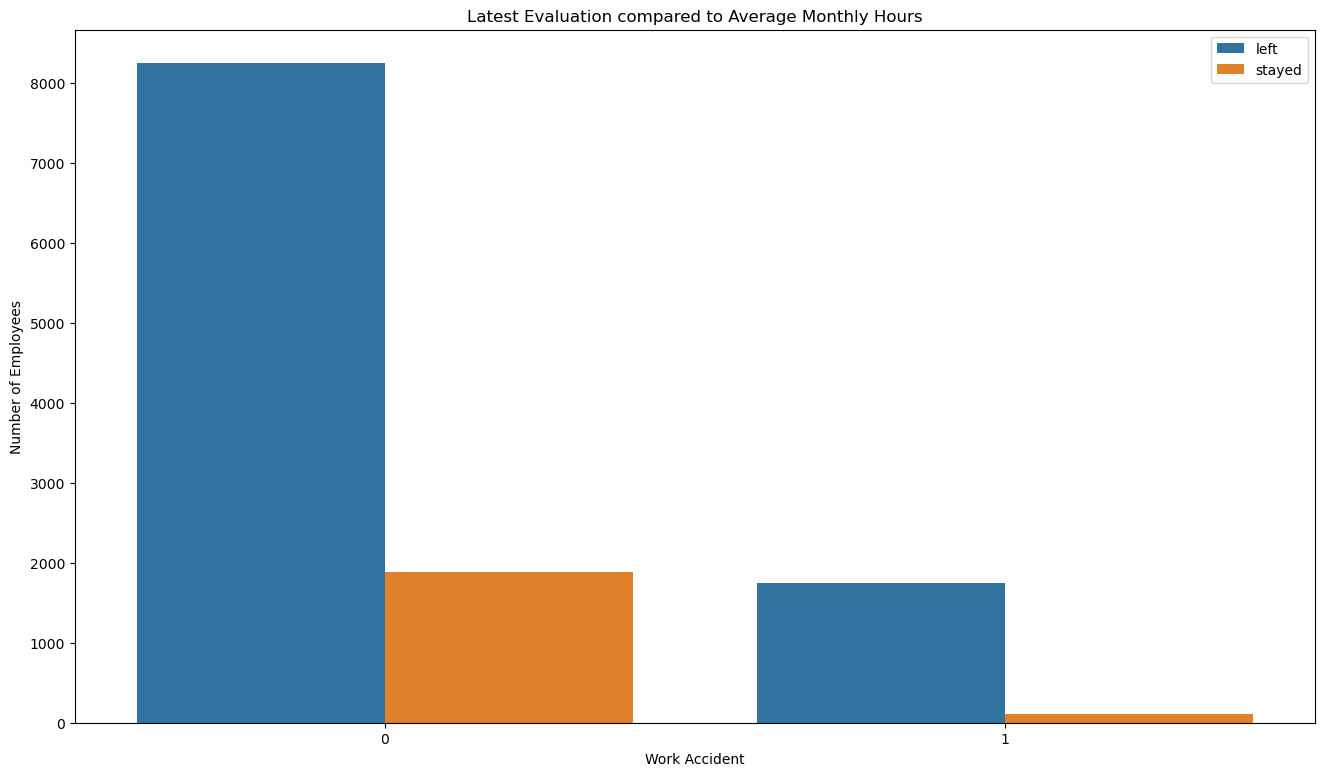

In [19]:
# Create a chart displaying "work_accident" to people who left
plt.figure(figsize=(16, 9))
sns.countplot(data=df1,x='work_accident', hue='left')
plt.xlabel('Work Accident')
plt.ylabel('Number of Employees')
plt.legend(labels=['left', 'stayed'])
plt.title('Latest Evaluation compared to Average Monthly Hours')

# Model - Random Forest

In [20]:
#Isolate target variable
y = df1['left']                 # target (0 = stayed, 1 = left)
X = df1.drop(['left'], axis=1)  # features
print(y.head())
print(X.head())

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64
   satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  promotion_last_5years department  salary  
0       3              0                      0      sales     low  
1       6              0                      0      sales  medium  
2       4              0                      0      sales  medium  
3       5              0                      0      sales     low  
4       3              0                      0      sales     low  


In [21]:
# Train test split, convert to dummy variables (One Hot Encoding)
X_encoded = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=42)

In [22]:
#Random Tree Model fitting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #Random Forest, 100 decision trees, random state 42
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:

y_pred = rf_model.predict(X_test)
print(y_pred)

[1 0 0 ... 0 0 0]


ROC AUC Score: 0.9753382349273569


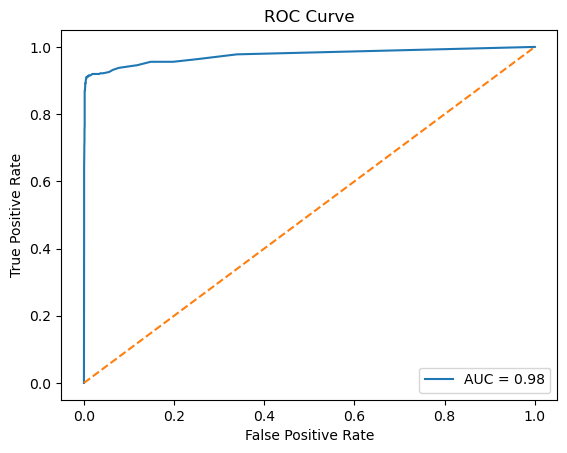

In [24]:
#Evaluate model using AUC Score - 
y_proba = rf_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

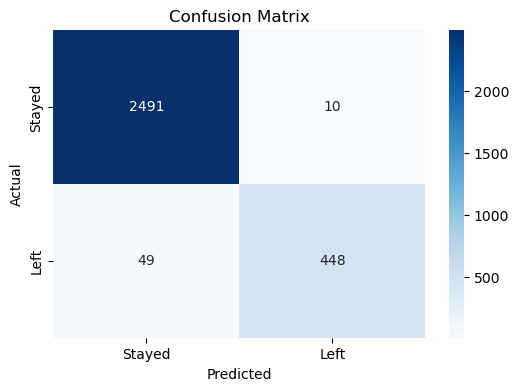

In [25]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Stayed', 'Left'], 
            yticklabels=['Stayed', 'Left'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [38]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Precision, Recall, F1-Score
print(classification_report(y_test, y_pred))

# Confusion Matrix
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9803202134756505
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2501
           1       0.98      0.90      0.94       497

    accuracy                           0.98      2998
   macro avg       0.98      0.95      0.96      2998
weighted avg       0.98      0.98      0.98      2998

[[2491   10]
 [  49  448]]


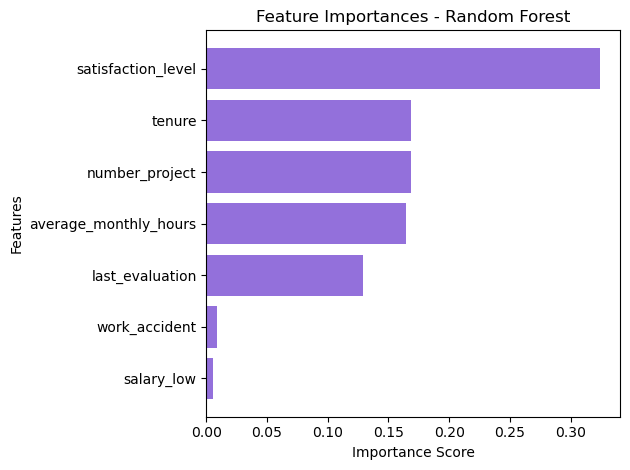

In [33]:
#Show most important variables contributing to left employees
# Get feature importances from the model
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort by importance
importances_sorted = importances.sort_values(ascending=False).head(7)

# Plot
plt.barh(importances_sorted.index, importances_sorted.values, color='mediumpurple')
plt.gca().invert_yaxis()
plt.title("Feature Importances - Random Forest")
plt.ylabel("Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

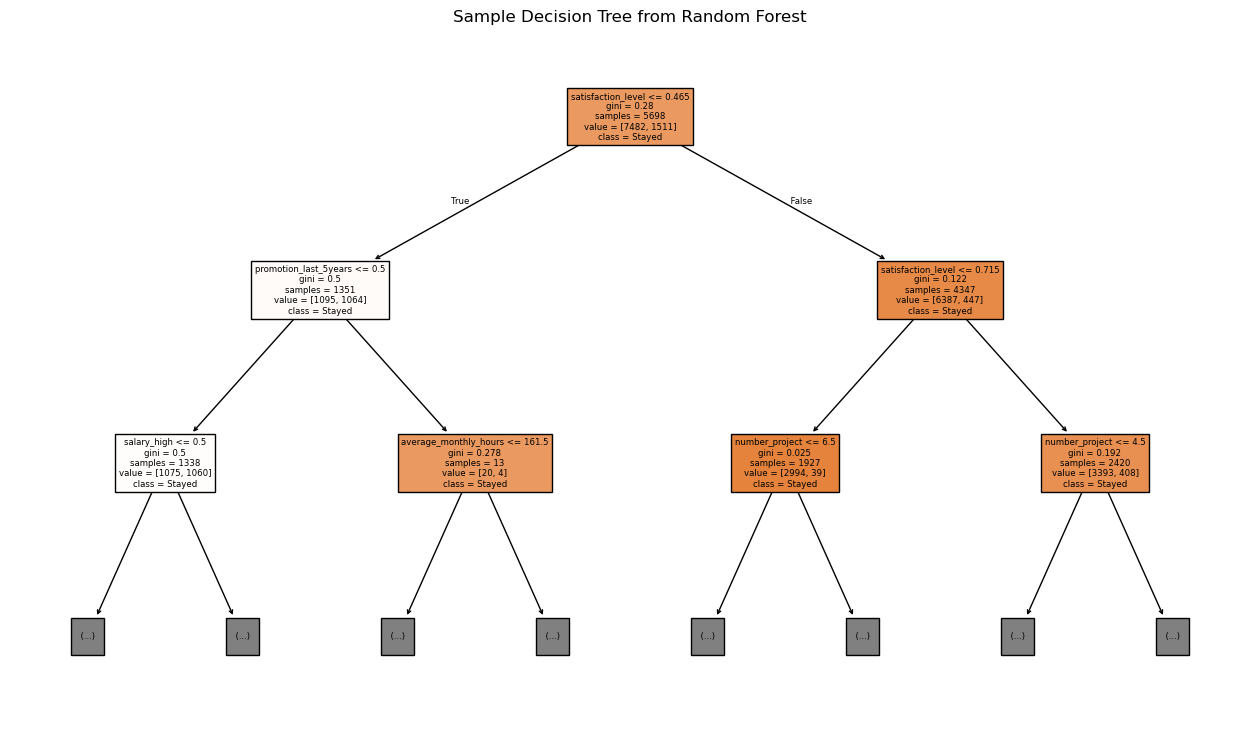

In [27]:
#Make a Decision tree showing random forest model visually 
# Pick one tree from the forest (e.g. the first one)
estimator = rf_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(16, 9))
plot_tree(estimator, 
          feature_names=X_train.columns,
          class_names=['Stayed', 'Left'],
          filled=True,
          max_depth=2)
plt.title("Sample Decision Tree from Random Forest")
plt.show()

# Conclusion 

From our model and feature importance confirms that employees at the company are overworked. To prevent employees from churning, the company should focus on:
1. Cap number of projects that employees can work at 3-5 per month (no more than 5)
2. Company should not have employees work more than 250 hours. Reward employees who work more projects and hours. 
3. Consider promoting employees or rewarding employees from years 1 - 4 as they have the highest churn rate. Why are 4-year employees unproportionately dissatisfied? 
4. Make sure the employees are familiar with companies overtime pay policies, and make sure work times are explictly stated. 
5. Employees with high evaluation scores are exclusively reserved for employees who work more than 200 hours.
6. Most of the employees in this company worked over 167 hours per month.